In [ ]:
import pandas as pd
df=pd.read_excel(r'/content/drive/MyDrive/balanced_data2.xlsx')
df.head(10)

,Question,Label
0,Write the correct answer: In general the two i...,6
1,If database modifications occur while the tran...,6
2,Define solvency and liquidity. Give some simpl...,5
3,Create a chart that compares things that use e...,2
4,Discuss the biological factors that cause the ...,5
5,Use the E-pH or Pourbaix diagram of Cr to dete...,5
6,Summarize your idea of Time Value of Money wit...,5
7,"Classifying the different types of angina, exp...",4
8,Suppose the two countries wish to specialize a...,4
9,Explain the concept of collision in the hashin...,4


In [ ]:
# Swap 5 and 6 in the 'Label' column
df['Label'] = df['Label'].replace({5: 6, 6: 5})

In [ ]:
df.head(10)

,Question,Label
0,Write the correct answer: In general the two i...,5
1,If database modifications occur while the tran...,5
2,Define solvency and liquidity. Give some simpl...,6
3,Create a chart that compares things that use e...,2
4,Discuss the biological factors that cause the ...,6
5,Use the E-pH or Pourbaix diagram of Cr to dete...,6
6,Summarize your idea of Time Value of Money wit...,6
7,"Classifying the different types of angina, exp...",4
8,Suppose the two countries wish to specialize a...,4
9,Explain the concept of collision in the hashin...,4


In [ ]:
df['Label'].value_counts()

,count
Label,
5,1300
6,1300
2,1300
4,1300
1,1300
3,1300


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7800 entries, 0 to 7799
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Question  7800 non-null   object
 1   Label     7800 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 122.0+ KB


In [ ]:
remembering_verbs = [
    "Arrange", "Define", "Describe", "Duplicate", "Identify", "Label",
    "List", "Match", "Memorize", "Name", "Order", "Outline", "Recognize",
    "Relate", "Recall", "Repeat", "Reproduce", "Select", "State"
]
understanding_verbs = [
    "Classify", "Convert", "Defend", "Describe", "Discuss", "Distinguish",
    "Estimate", "Explain", "Express", "Extend", "Generalized", "Give example(s)",
    "Identify", "Indicate", "Infer", "Locate", "Paraphrase", "Predict",
    "Recognize", "Rewrite", "Review", "Select", "Summarize", "Translate"
]
applying_verbs = [
    "Apply", "Change", "Choose", "Compute", "Demonstrate", "Discover",
    "Dramatize", "Employ", "Illustrate", "Interpret", "Manipulate", "Modify",
    "Operate", "Practice", "Predict", "Prepare", "Produce", "Relate",
    "Schedule", "Sketch", "Solve", "Use", "Write"
]
analysing_verbs = [
    "Analyze", "Appraise", "Breakdown", "Calculate", "Categorize", "Compare",
    "Contrast", "Criticize", "Diagram", "Differentiate", "Discriminate",
    "Distinguish", "Examine", "Experiment", "Identify", "Illustrate", "Infer",
    "Model", "Outline", "Point out", "Question", "Relate", "Select", "Separate",
    "Subdivide", "Test"
]

evaluating_verbs = [
    "Appraise", "Argue", "Assess", "Attach", "Choose", "Compare", "Conclude",
    "Contrast", "Defend", "Describe", "Discriminate", "Estimate", "Evaluate",
    "Explain", "Judge", "Justify", "Interpret", "Relate", "Predict", "Rate",
    "Select", "Summarize", "Support", "Value"
]
creating_verbs = [
    "Arrange", "Assemble", "Categorize", "Collect", "Combine", "Comply",
    "Compose", "Construct", "Create", "Design", "Develop", "Devise", "Explain",
    "Formulate", "Generate", "Plan", "Prepare", "Rearrange", "Reconstruct",
    "Relate", "Reorganize", "Revise", "Rewrite", "Set up", "Summarize",
    "Synthesize", "Tell", "Write"
]


In [ ]:
# Dictionary mapping level to action verbs
bloom_verbs = {
    1: remembering_verbs,
    2: understanding_verbs,
    3: applying_verbs,
    4: analysing_verbs,
    5: evaluating_verbs,
    6: creating_verbs
}

# Flatten all verbs into one set for lookup
all_verbs = set(v.lower() for verbs in bloom_verbs.values() for v in verbs)


In [ ]:
all_verbs

{'analyze',
 'apply',
 'appraise',
 'argue',
 'arrange',
 'assemble',
 'assess',
 'attach',
 'breakdown',
 'calculate',
 'categorize',
 'change',
 'choose',
 'classify',
 'collect',
 'combine',
 'compare',
 'comply',
 'compose',
 'compute',
 'conclude',
 'construct',
 'contrast',
 'convert',
 'create',
 'criticize',
 'defend',
 'define',
 'demonstrate',
 'describe',
 'design',
 'develop',
 'devise',
 'diagram',
 'differentiate',
 'discover',
 'discriminate',
 'discuss',
 'distinguish',
 'dramatize',
 'duplicate',
 'employ',
 'estimate',
 'evaluate',
 'examine',
 'experiment',
 'explain',
 'express',
 'extend',
 'formulate',
 'generalized',
 'generate',
 'give example(s)',
 'identify',
 'illustrate',
 'indicate',
 'infer',
 'interpret',
 'judge',
 'justify',
 'label',
 'list',
 'locate',
 'manipulate',
 'match',
 'memorize',
 'model',
 'modify',
 'name',
 'operate',
 'order',
 'outline',
 'paraphrase',
 'plan',
 'point out',
 'practice',
 'predict',
 'prepare',
 'produce',
 'question',


In [ ]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

def extract_verb_features(question):
    tokens = word_tokenize(question.lower())
    features = [0]*6
    for i in range(6):
        level = i + 1
        verbs = set(v.lower() for v in bloom_verbs[level])
        if any(t in verbs for t in tokens):
            features[i] = 1  # 1 if any action verb of level-i is present
    return features

# Apply to all questions
verb_features = df['Question'].apply(extract_verb_features)
verb_df = pd.DataFrame(verb_features.tolist(), columns=[f"verb_lvl_{i}" for i in range(1, 7)])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
verb_df

,verb_lvl_1,verb_lvl_2,verb_lvl_3,verb_lvl_4,verb_lvl_5,verb_lvl_6
0,0,0,1,0,0,1
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,1,0,0,1
4,0,1,0,0,0,0
...,...,...,...,...,...,...
7795,0,1,0,0,0,0
7796,0,0,0,0,1,0
7797,0,1,0,1,0,0
7798,0,0,1,1,0,0


In [ ]:
import tensorflow_hub as hub
import tensorflow as tf
import numpy as np

# Load the ELMo model from TF Hub
elmo = hub.load("https://tfhub.dev/google/elmo/3")

# Define a function to get ELMo embedding for each question
def elmo_embed(texts):
    embeddings = elmo.signatures["default"](tf.constant(texts))["default"]
    return embeddings.numpy()

# Generate embeddings for all questions
questions = df["Question"].tolist()
elmo_vectors = []

# Generate in batches to avoid memory issues
batch_size = 32
for i in range(0, len(questions), batch_size):
    batch = questions[i:i+batch_size]
    batch_embeddings = elmo_embed(batch)
    elmo_vectors.extend(batch_embeddings)

elmo_df = pd.DataFrame(elmo_vectors)


In [ ]:
elmo_df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.050475,0.149519,-0.076883,0.128491,-0.326272,0.231008,-0.199615,0.166752,-0.365423,-0.125499,...,-0.289120,0.313097,0.190375,0.242016,-0.056314,0.215303,0.250144,-0.159135,0.055733,0.116504
1,-0.027213,0.280894,-0.350566,0.189693,-0.117292,-0.770240,-0.010300,0.148943,-0.100111,0.070782,...,0.052223,0.408390,0.109114,-0.061968,0.244113,0.051032,0.460864,0.067741,0.203564,-0.196622


In [ ]:
# Concatenate ELMo embeddings with verb-level features
from sklearn.preprocessing import LabelEncoder

X = pd.concat([elmo_df, verb_df], axis=1)
y = df['Label']  # Already labeled 1–6

# Encode labels (if needed)
le = LabelEncoder()
y_encoded = le.fit_transform(y)


In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,...,1020,1021,1022,1023,verb_lvl_1,verb_lvl_2,verb_lvl_3,verb_lvl_4,verb_lvl_5,verb_lvl_6
0,0.050475,0.149519,-0.076883,0.128491,-0.326272,0.231008,-0.199615,0.166752,-0.365423,-0.125499,...,0.250144,-0.159135,0.055733,0.116504,0,0,1,0,0,1
1,-0.027213,0.280894,-0.350566,0.189693,-0.117292,-0.770240,-0.010300,0.148943,-0.100111,0.070782,...,0.460864,0.067741,0.203564,-0.196622,0,0,1,0,0,0
2,-0.428531,0.036996,0.014063,-0.103339,0.171300,-0.010597,-0.291992,0.258477,-0.280628,0.021537,...,0.447069,-0.217439,0.418072,-0.100261,1,0,0,0,0,0
3,0.099859,0.141376,-0.023436,-0.115252,-0.037269,-0.189164,-0.164151,0.126799,-0.317687,0.009982,...,0.655293,-0.111992,0.247571,0.217130,0,0,1,0,0,1
4,-0.244167,0.478932,-0.493283,0.213273,-0.159463,0.040561,-0.018416,0.348162,0.040531,-0.083989,...,0.245752,-0.159883,0.238400,0.195819,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7795,-0.302065,0.019628,0.018890,-0.142490,0.052743,0.421195,-0.057924,0.235948,-0.272914,0.030494,...,0.229081,-0.432866,0.076682,-0.080355,0,1,0,0,0,0
7796,-0.191870,0.098250,-0.165414,-0.055683,-0.261672,-0.042929,-0.144501,0.320516,0.270045,-0.241970,...,-0.134783,-0.236653,-0.043026,0.065005,0,0,0,0,1,0
7797,-0.051784,0.280821,-0.318292,-0.055343,0.088022,-0.060948,-0.044323,0.334738,0.113835,0.139475,...,0.872637,-0.203455,0.120713,-0.225871,0,1,0,1,0,0
7798,-0.210438,-0.008322,-0.195963,-0.068631,0.128863,-0.048843,-0.184509,0.174411,-0.159000,0.339974,...,0.592354,-0.115194,0.102431,-0.095666,0,0,1,1,0,0


In [ ]:
y_encoded

array([4, 4, 5, ..., 5, 3, 3])

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

# Convert label to one-hot
y_cat = to_categorical(y_encoded)

#Normalize verb features
scaler = StandardScaler()
X_verb_scaled = scaler.fit_transform(verb_df)

# Reshape ELMo vectors to 3D for RNN: (samples, timesteps, features)
# Treat the entire ELMo vector as a single timestep
X_elmo_seq = np.expand_dims(np.array(elmo_df), axis=1)  # shape: (samples, 1, 1024)


In [ ]:
y_cat

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.]])

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Bidirectional, LSTM, Dense, Concatenate, Dropout

# ELMo input
elmo_input = Input(shape=(1, 1024), name='elmo_input')
lstm_out = Bidirectional(LSTM(128))(elmo_input)  # Output shape: (None, 256)

# Action verb input
verb_input = Input(shape=(6,), name='verb_input')

# Combine both
combined = Concatenate()([lstm_out, verb_input])

# Dense layers
dense1 = Dense(256, activation='relu')(combined)
drop1 = Dropout(0.5)(dense1)
dense2 = Dense(128, activation='relu')(drop1)
output = Dense(6, activation='softmax')(dense2)

# Build model
model = Model(inputs=[elmo_input, verb_input], outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ elmo_input          │ (None, 1, 1024)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_1     │ (None, 256)       │  1,180,672 │ elmo_input[0][0]  │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ verb_input          │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 262)       │          0 │ bidirectional_1[… │
│ (Concatenate)       │                   │            │ verb_input[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 256)       │     67,328 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 256)       │          0 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 128)       │     32,896 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 6)         │        774 │ dense_4[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,281,670 (4.89 MB)

 Trainable params: 1,281,670 (4.89 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train-test split
from sklearn.model_selection import train_test_split

X_elmo_train, X_elmo_test, X_verb_train, X_verb_test, y_train_final, y_test_final = train_test_split(
    X_elmo_seq, X_verb_scaled, y_cat, test_size=0.4, stratify=y_encoded, random_state=42
)

# Train
history = model.fit(
    [X_elmo_train, X_verb_train], y_train_final,
    validation_data=([X_elmo_test, X_verb_test], y_test_final),
    epochs=20,
    batch_size=50
)

Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.9622 - loss: 0.1535 - val_accuracy: 0.9247 - val_loss: 0.3466
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9850 - loss: 0.0486 - val_accuracy: 0.9378 - val_loss: 0.3523
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.9939 - loss: 0.0181 - val_accuracy: 0.9353 - val_loss: 0.3931
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.9967 - loss: 0.0101 - val_accuracy: 0.9391 - val_loss: 0.3992
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9965 - loss: 0.0116 - val_accuracy: 0.9385 - val_loss: 0.3779
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9993 - loss: 0.0035 - val_accuracy: 0.9362 - val_loss: 0.3989
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 0.9404 - val_loss: 0.3903
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.9973 - loss: 0.0096 - val_accuracy: 0.9378 - v

In [ ]:
loss, accuracy = model.evaluate([X_elmo_test, X_verb_test], y_test_final)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9318 - loss: 0.4572
Test Accuracy: 92.85%


In [ ]:
model.save('elmo_verb_bloom_model.h5')


In [ ]:
# During training
import joblib
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Get predicted probabilities
y_pred_probs = model.predict([X_elmo_test, X_verb_test])

# Convert to predicted class labels
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_final, axis=1)


98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


In [ ]:
remembering_verbs = [
    "Arrange", "Define", "Describe", "Duplicate", "Identify", "Label",
    "List", "Match", "Memorize", "Name", "Order", "Outline", "Recognize",
    "Relate", "Recall", "Repeat", "Reproduce", "Select", "State"
]
understanding_verbs = [
    "Classify", "Convert", "Defend", "Describe", "Discuss", "Distinguish",
    "Estimate", "Explain", "Express", "Extend", "Generalized", "Give example(s)",
    "Identify", "Indicate", "Infer", "Locate", "Paraphrase", "Predict",
    "Recognize", "Rewrite", "Review", "Select", "Summarize", "Translate"
]
applying_verbs = [
    "Apply", "Change", "Choose", "Compute", "Demonstrate", "Discover",
    "Dramatize", "Employ", "Illustrate", "Interpret", "Manipulate", "Modify",
    "Operate", "Practice", "Predict", "Prepare", "Produce", "Relate",
    "Schedule", "Sketch", "Solve", "Use", "Write"
]
analysing_verbs = [
    "Analyze", "Appraise", "Breakdown", "Calculate", "Categorize", "Compare",
    "Contrast", "Criticize", "Diagram", "Differentiate", "Discriminate",
    "Distinguish", "Examine", "Experiment", "Identify", "Illustrate", "Infer",
    "Model", "Outline", "Point out", "Question", "Relate", "Select", "Separate",
    "Subdivide", "Test"
]

evaluating_verbs = [
    "Appraise", "Argue", "Assess", "Attach", "Choose", "Compare", "Conclude",
    "Contrast", "Defend", "Describe", "Discriminate", "Estimate", "Evaluate",
    "Explain", "Judge", "Justify", "Interpret", "Relate", "Predict", "Rate",
    "Select", "Summarize", "Support", "Value"
]
creating_verbs = [
    "Arrange", "Assemble", "Categorize", "Collect", "Combine", "Comply",
    "Compose", "Construct", "Create", "Design", "Develop", "Devise", "Explain",
    "Formulate", "Generate", "Plan", "Prepare", "Rearrange", "Reconstruct",
    "Relate", "Reorganize", "Revise", "Rewrite", "Set up", "Summarize",
    "Synthesize", "Tell", "Write"
]


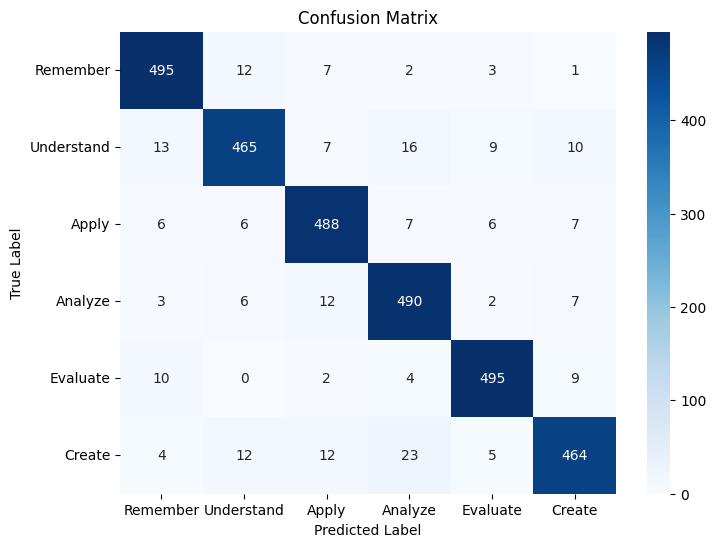

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Define class names (Bloom’s taxonomy levels)
class_names = ['Remember', 'Understand', 'Apply', 'Analyze', 'Evaluate', 'Create']

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
# Generate classification report
report = classification_report(y_true, y_pred, target_names=class_names)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

    Remember       0.93      0.95      0.94       520
  Understand       0.93      0.89      0.91       520
       Apply       0.92      0.94      0.93       520
     Analyze       0.90      0.94      0.92       520
    Evaluate       0.95      0.95      0.95       520
      Create       0.93      0.89      0.91       520

    accuracy                           0.93      3120
   macro avg       0.93      0.93      0.93      3120
weighted avg       0.93      0.93      0.93      3120

